# Traffic Signal Classification

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import random

In [2]:
with open("traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [3]:
train['features'].shape

(34799, 32, 32, 3)

In [4]:
X_train = train['features']
y_train = train['labels']

In [5]:
X_test = test['features']
y_test = test['labels']

In [6]:
X_val = valid['features']
y_val = valid['labels']

In [7]:
X_train.shape

(34799, 32, 32, 3)

In [8]:
y_train.shape

(34799,)

In [9]:
X_test.shape

(12630, 32, 32, 3)

In [10]:
X_val.shape

(4410, 32, 32, 3)

31

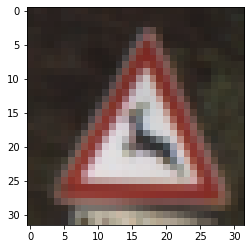

In [18]:
plt.imshow(X_train[500])
y_train[500]

In [34]:
del ax

41

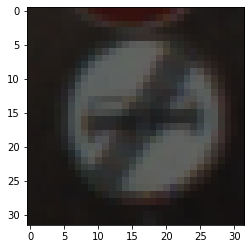

In [45]:
plt.imshow(X_train[22])
y_train[22]

38
17
35
11
8


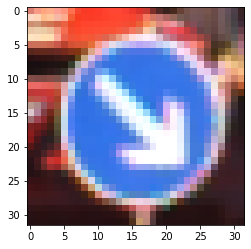

<Figure size 432x288 with 0 Axes>

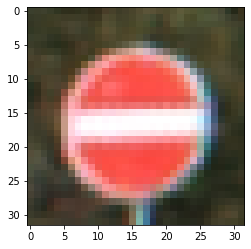

<Figure size 432x288 with 0 Axes>

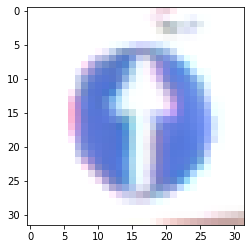

<Figure size 432x288 with 0 Axes>

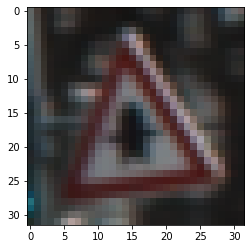

<Figure size 432x288 with 0 Axes>

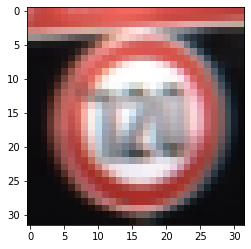

<Figure size 432x288 with 0 Axes>

In [59]:
for i in range(5):
    r = random.randint(1,34799)
    plt.figure(figsize=(4,4))
    plt.imshow(X_train[r])
    plt.figure()
    print(y_train[r])

In [11]:
from sklearn.utils import shuffle

In [12]:
X_train, y_train = shuffle(X_train , y_train)

In [13]:
X_train.shape

(34799, 32, 32, 3)

In [14]:
X_train_gray = np.average(X_train , axis= 3)

In [15]:
X_train_gray.shape

(34799, 32, 32)

In [16]:
X_test_gray = np.average(X_test , axis= 3)
X_val_gray = np.average(X_val , axis= 3)

In [17]:
X_test_gray.shape

(12630, 32, 32)

18
25
38
8
14


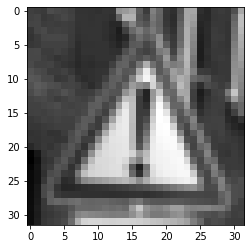

<Figure size 432x288 with 0 Axes>

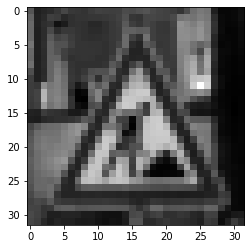

<Figure size 432x288 with 0 Axes>

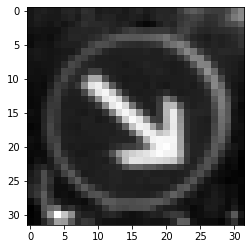

<Figure size 432x288 with 0 Axes>

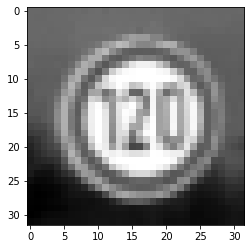

<Figure size 432x288 with 0 Axes>

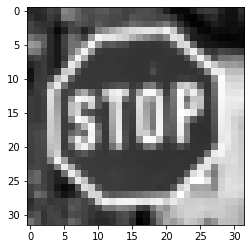

<Figure size 432x288 with 0 Axes>

In [79]:
for i in range(5):
    r = random.randint(1,34799)
    plt.figure(figsize=(4,4))
    plt.imshow(X_train_gray[r],cmap='gray')
    plt.figure()
    print(y_train[r])

In [80]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [81]:
scaler = StandardScaler()
minmax = MinMaxScaler()

In [85]:
# X_train_gray_scale = scaler.fit_transform(X_train_gray)

In [86]:
# X_train_gray_norm = minmax.fit_transform(X_train_gray)

In [18]:
from keras.models import Sequential

Using TensorFlow backend.
C:\Users\david\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\david\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\david\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\david\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [19]:
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [142]:
del cnn

In [143]:
cnn = Sequential()

In [144]:
cnn.add(Conv2D(filters=6, kernel_size=(5,5), activation='relu'))
cnn.add(AveragePooling2D())
cnn.add(Conv2D(filters=16, kernel_size=(5,5)))
cnn.add(MaxPooling2D())
cnn.add(Flatten())
cnn.add(Dense(units=600, activation='relu'))
cnn.add(Dense(units=300, activation='relu'))
cnn.add(Dense(units=43, activation='softmax'))

In [145]:
cnn.compile(loss = 'sparse_categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])

In [146]:
X_train_gray = X_train_gray.reshape(34799,32,32,1)
X_val_gray = X_val_gray.reshape(4410,32,32,1)
X_test_gray = X_test_gray.reshape(12630,32,32,1)

In [149]:
cnn_model = cnn.fit(X_train_gray,y_train,batch_size=10,epochs= 5, validation_data=(X_val_gray,y_val))

Train on 34799 samples, validate on 4410 samples
Epoch 1/5
34799/34799 [==============================] - 59s 2ms/step - loss: 0.2597 - accuracy: 0.9333 - val_loss: 0.7300 - val_accuracy: 0.8805
Epoch 2/5
34799/34799 [==============================] - 64s 2ms/step - loss: 0.2295 - accuracy: 0.9436 - val_loss: 0.6484 - val_accuracy: 0.8941
Epoch 3/5
34799/34799 [==============================] - 57s 2ms/step - loss: 0.2045 - accuracy: 0.9528 - val_loss: 0.5983 - val_accuracy: 0.8980
Epoch 4/5
34799/34799 [==============================] - 44s 1ms/step - loss: 0.2149 - accuracy: 0.9544 - val_loss: 0.8051 - val_accuracy: 0.8780
Epoch 5/5
34799/34799 [==============================] - 44s 1ms/step - loss: 0.1734 - accuracy: 0.9648 - val_loss: 0.5654 - val_accuracy: 0.9172


In [139]:
accuracy_test = cnn.evaluate(X_test_gray,y_test)

12630/12630 [==============================] - 4s 331us/step


In [140]:
print(f'the test accuracy of the CNN model is: {accuracy_test[1]}')

the test accuracy of the CNN model is: 0.8920823335647583


In [35]:
train_accuracy = cnn_model.history['accuracy']
val_accuracy = cnn_model.history['val_accuracy']
train_loss = cnn_model.history['loss']
val_loss = cnn_model.history['val_loss']

In [52]:
epochs = list(map(lambda x:x+1, cnn_model.epoch))

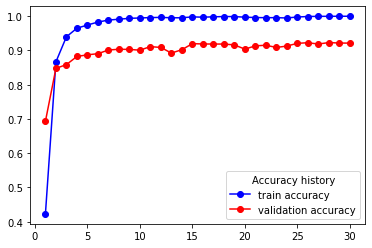

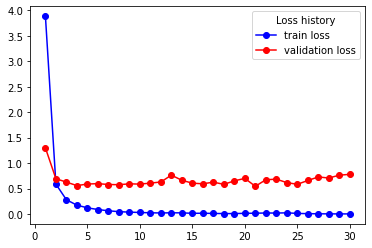

In [72]:
plt.plot(epochs,train_accuracy,color='blue', marker='o')
plt.plot(epochs,val_accuracy, color='red',marker='o')
plt.legend(labels=["train accuracy","validation accuracy"] ,title = "Accuracy history")

plt.figure()
plt.plot(epochs,train_loss,color='blue', marker='o')
plt.plot(epochs,val_loss, color='red',marker='o')
plt.legend(labels=['train loss','validation loss'],title = "Loss history");

In [125]:
y_test_pred = cnn.predict_classes(X_test_gray)

In [80]:
from sklearn.metrics import confusion_matrix, classification_report

In [88]:
pd.set_option('display.max_columns', None)
pd.DataFrame(confusion_matrix(y_test,y_test_pred))


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,43,10,0,0,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,692,6,0,7,0,0,1,2,0,0,0,3,1,1,0,0,0,1,0,0,0,0,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,14,719,7,3,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
3,0,1,1,408,0,27,1,0,0,2,3,2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0
4,0,11,7,1,595,8,6,5,13,0,0,0,3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,1,0,2,0,3,0,0
5,0,4,13,10,0,578,1,6,0,0,2,0,4,0,0,3,0,0,0,0,0,0,0,4,0,3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6,0,3,4,0,0,1,117,0,14,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,7
7,0,0,0,7,0,9,0,384,34,3,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,0,1,0,0,2,0,0,0,0
8,0,2,1,7,3,6,0,11,402,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,1,3,5,0,0,0,1,0,2,0,0
9,0,0,0,9,0,0,0,0,0,462,8,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [82]:
print(classification_report(y_test,y_test_pred))


              precision    recall  f1-score   support

           0       0.96      0.72      0.82        60
           1       0.89      0.96      0.93       720
           2       0.95      0.96      0.96       750
           3       0.86      0.91      0.88       450
           4       0.95      0.90      0.93       660
           5       0.90      0.92      0.91       630
           6       0.94      0.78      0.85       150
           7       0.91      0.85      0.88       450
           8       0.84      0.89      0.87       450
           9       0.94      0.96      0.95       480
          10       0.93      0.98      0.95       660
          11       0.85      0.90      0.88       420
          12       0.96      0.98      0.97       690
          13       0.99      0.98      0.99       720
          14       0.90      0.91      0.90       270
          15       0.94      0.97      0.95       210
          16       0.97      0.97      0.97       150
          17       0.99    

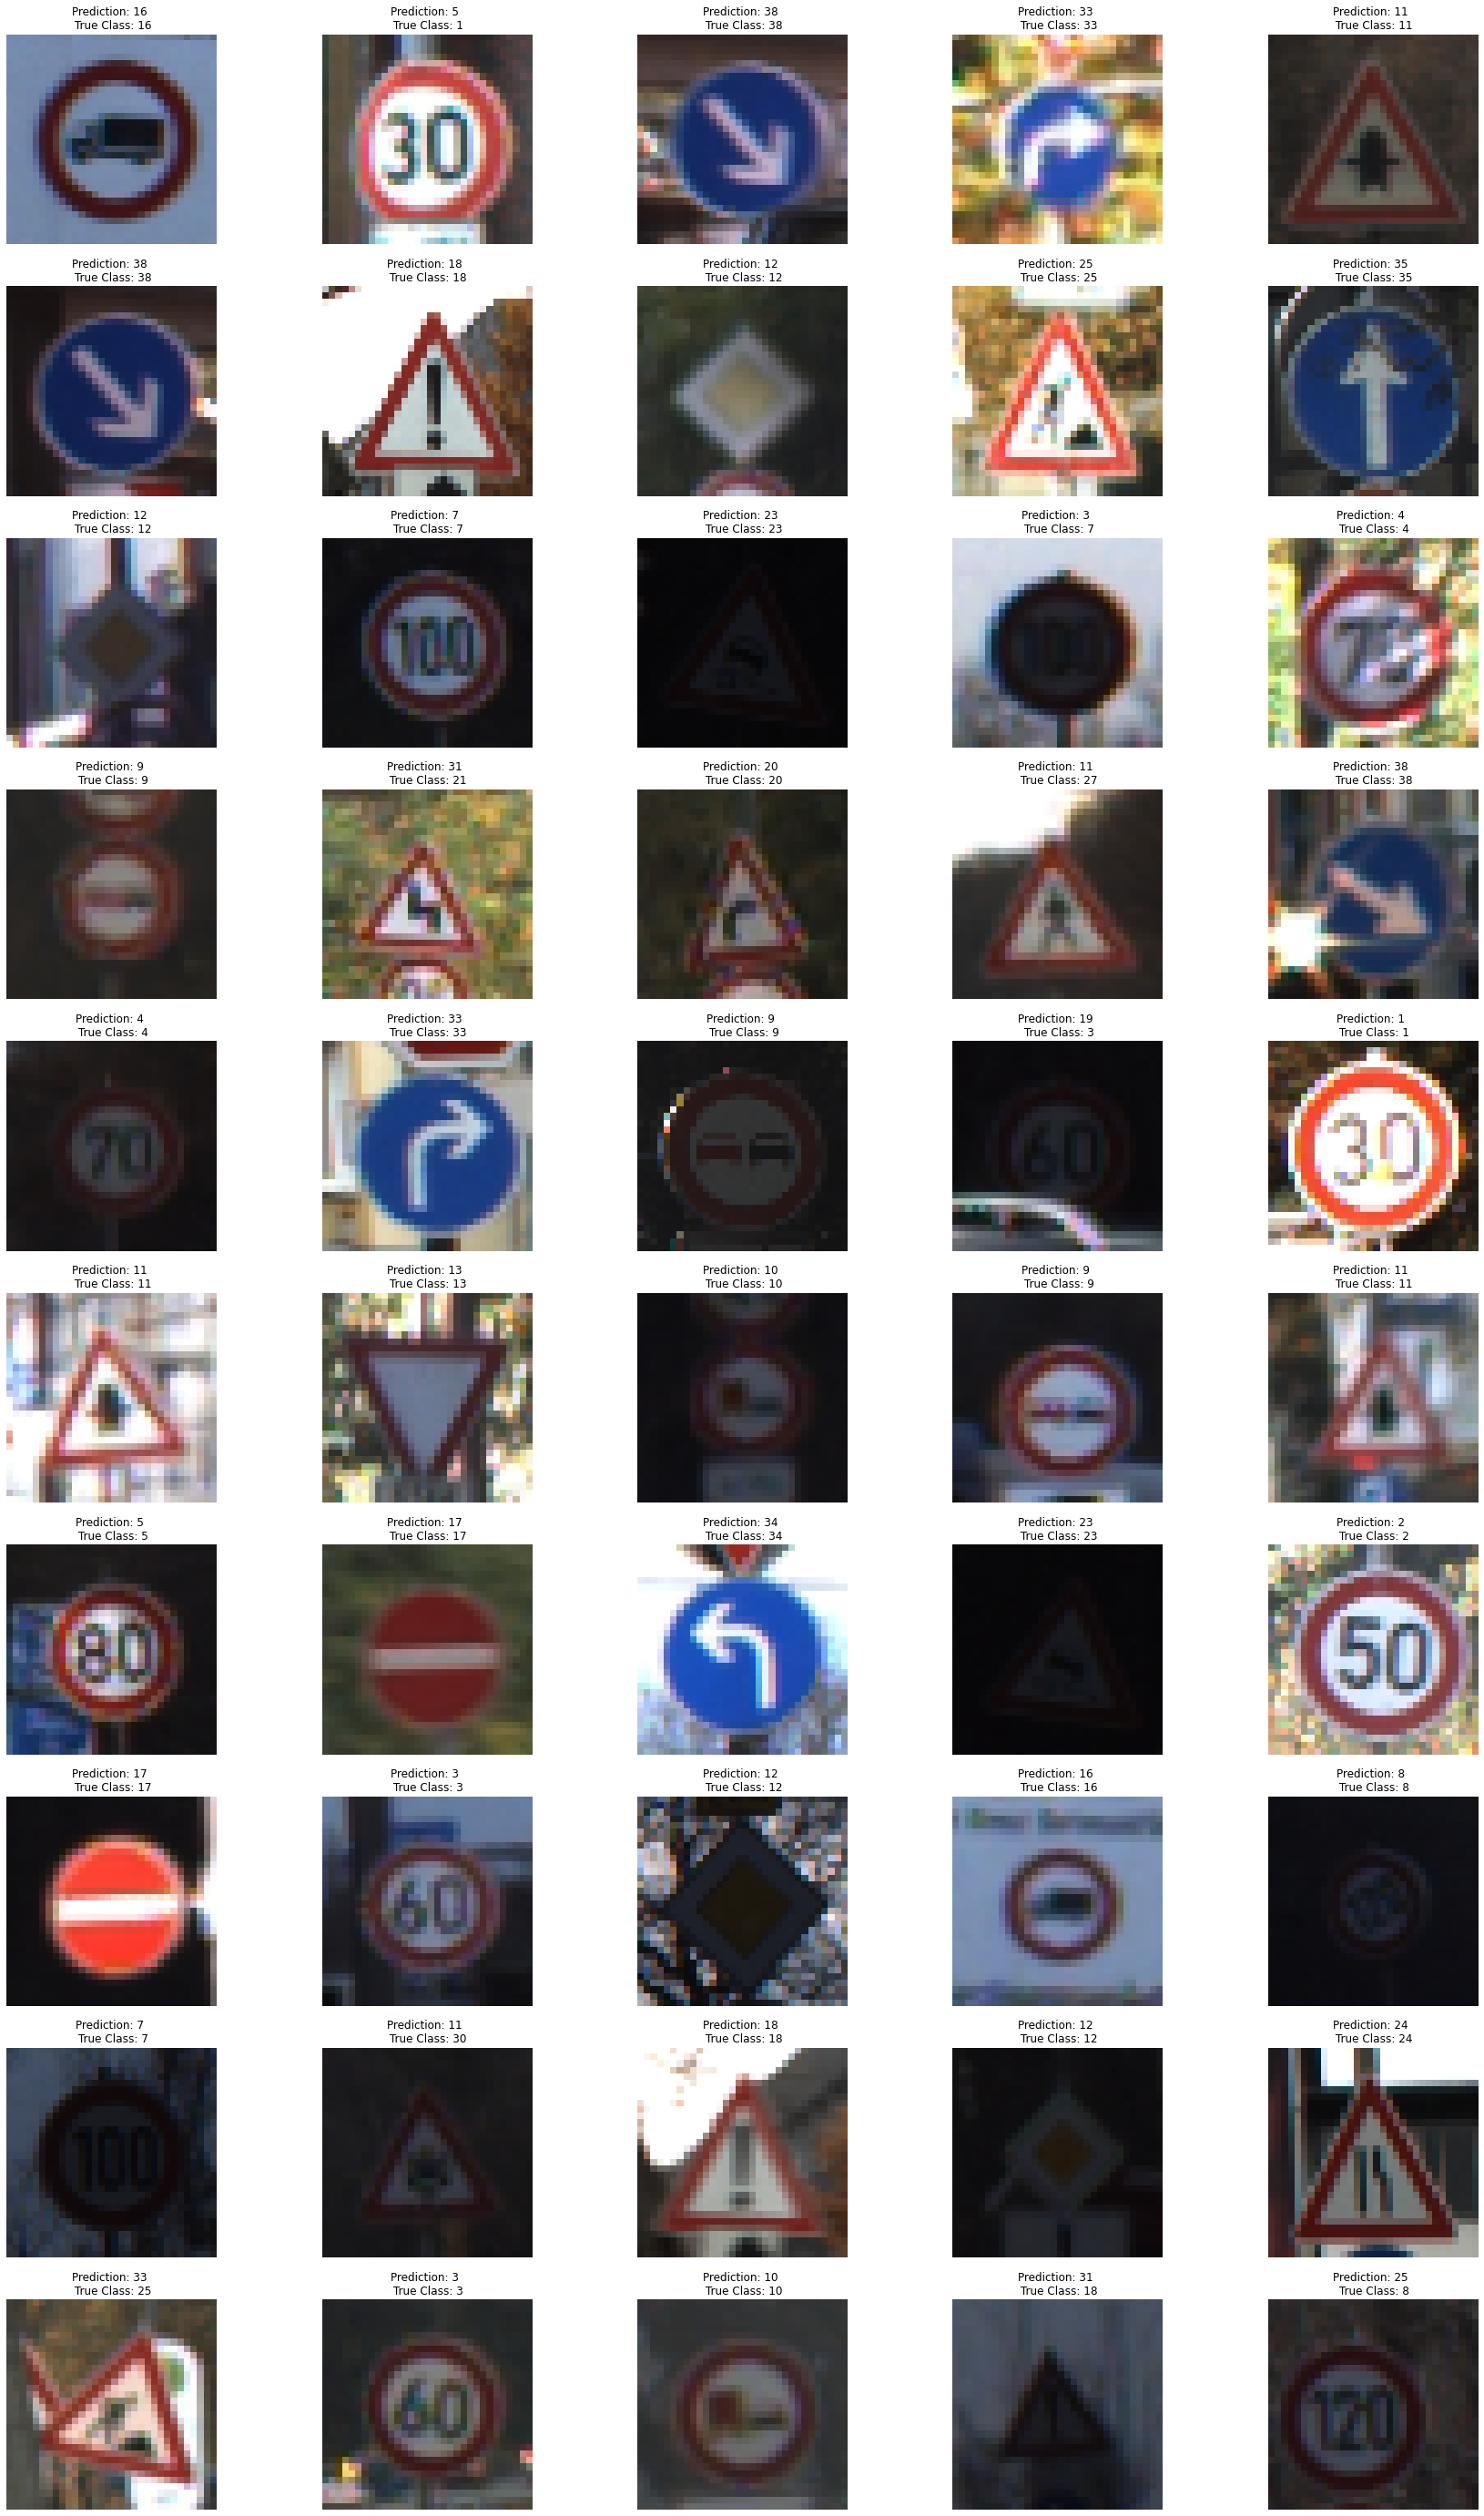

In [126]:
fig, axes = plt.subplots(10, 5, figsize=(30,50))
axes = axes.ravel()
for i in range(50):
    axes[i].imshow(X_test[i])
    axes[i].set_title(f'Prediction: {y_test_pred[i]} \n True Class: {y_test[i]}')
    axes[i].axis('off')